In [1]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('crypto_data.csv')

In [3]:
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
df = df.loc[df['IsTrading'] == True]
df = df.loc[df['TotalCoinsMined'] > 0]

In [5]:
df['TotalCoinSupply'] = df['TotalCoinSupply'].astype(float)
df =df.dropna(axis=0, how='any')
df = df.reset_index()
df.drop(['index', 'Unnamed: 0', 'CoinName', 'IsTrading'], axis='columns', inplace=True)

In [6]:
df.head()
len(df)

532

In [7]:
df =pd.get_dummies(df)

In [8]:
df.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
scaler = StandardScaler()
data_scale = scaler.fit_transform(df)

In [10]:
print(df.shape)

(532, 98)


In [11]:
pca = PCA(n_components=0.90)
pca_d = pca.fit_transform(data_scale)

In [12]:
pca_df = pd.DataFrame(data=pca_d)
print(pca_df.shape)

(532, 74)


In [13]:
pca.explained_variance_.sum()

88.47283457566151

In [18]:
tsne_setting = TSNE(learning_rate=35)
tsne_model = tsne_setting.fit_transform(pca_df)

(532, 2)

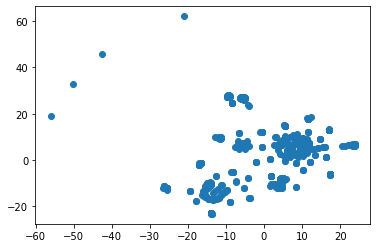

In [20]:
x = tsne_model[:,0]
y = tsne_model[:,1]
plt.scatter(x, y)
plt.show()

C:\Users\Stephen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


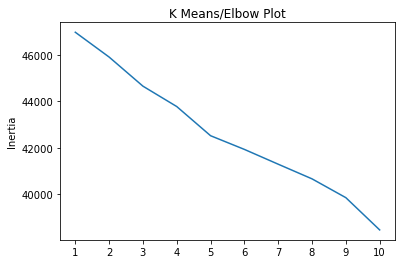

In [25]:
inertia = []
k = list(range(1, 11))

for i in k:
    kem = KMeans(n_clusters=i, random_state=0)
    kem.fit(pca_df)
    inertia.append(kem.inertia_)

k_data = {"k": k, "inertia": inertia}
df_kmean = pd.DataFrame(k_data)

plt.plot(df_kmean['k'], df_kmean['inertia'])
plt.xticks(range(1,11))
plt.title('K Means/Elbow Plot')
plt.ylabel('Inertia')
plt.show()

Based on the analysis of Cyrpto Currencies I do not believe these currencies can be clustered or grouped together. Notice how the elbow plot is linear and appears more of a straight line, this indicates that there are less likely to be distinguishable clusters in the data. If the line appeared curved with an infliction point of where the line turns then we would be able to cluster the data, but that is not the case with the cypto currency dataset.